Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# EKONOMIJA
## 30.03.2021. 

# Ana Zoric 0009/2020

***

<font color='red'>
Preimenovati svesku: File/Rename u __ekonomija_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb)</font>

***

#### __Zadatak 1__: Dinamički model
Za malu porodičnu piceriju funkcije ponude i potražnje su linearne funkcije cene: $Q_d(P) = A - BP$ i $Q_s(P) = -C + DP$, gde je $A = 22$ pice po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 7$ pica po danu po evru.

a) Formirati Python skriptu koja prema algoritmu sa slajdova, za definisane funkcije ponude i potražnje pronalazi stacionarno stanje $P_{eq}$. Na istom grafiku nacrtati funkcije $Q_d(P)$ i  $Q_s(P)$. Označiti ose grafika. 

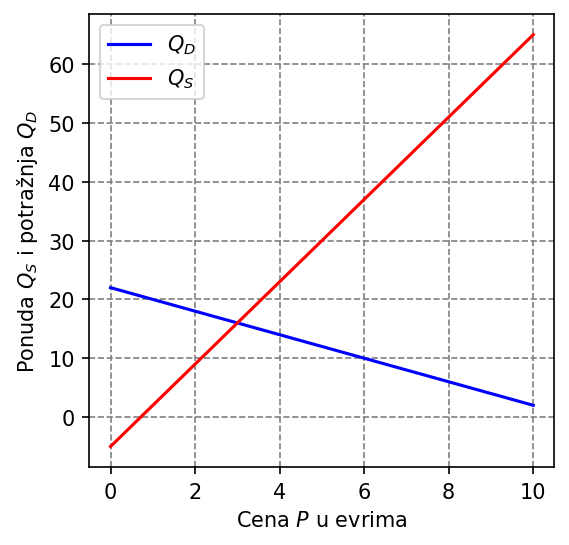

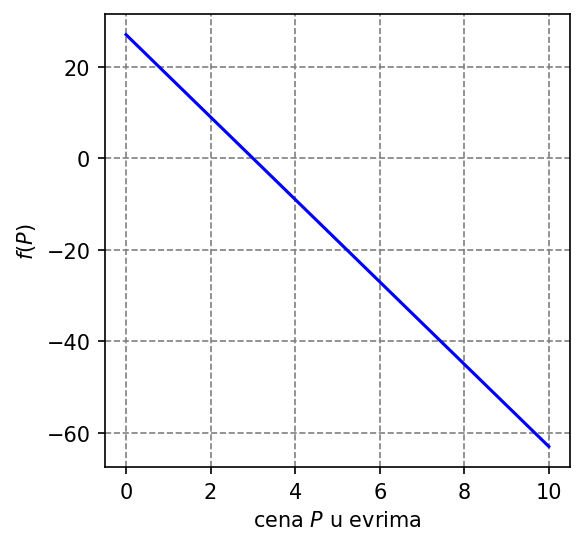

3.0000000000000004


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import newton

a,b,c,d=22,2,5,7
qd=lambda p,a,b: a-b*p
qs=lambda p,c,d: -c+d*p
f=lambda p,a,b,c,d: qd(p,a,b)-qs(p,c,d)

p=np.linspace(0,10,2000)


plt.figure(figsize=(4,4),dpi=150)
plt.plot(p,qd(p,a,b), "b-",label="$Q_{D}$")
plt.plot(p,qs(p,c,d), "r-",label="$Q_{S}$")
plt.legend()
plt.xlabel('Cena $P$ u evrima')
plt.ylabel('Ponuda $Q_S$ i potražnja $Q_D$')
plt.grid(b=True,which='both', color='grey',linestyle='--')
plt.show()

plt.figure(figsize=(4,4), dpi=150)
plt.plot(p,f(p,a,b,c,d),"b-")
plt.xlabel("cena $P$ u evrima")
plt.ylabel("$f(P)$")
plt.grid(b=True,which='both', color='grey', linestyle='--')
plt.show()

z=np.sign(f(p,a,b,c,d))
rzl=np.diff(z)
n=np.where(rzl!=0)[0]

Peq=[scipy.optimize.newton(f,p[n[ink]],args=(a,b,c,d)) for ink in range(len(n))]
for ink in range(len(Peq)):
    print(Peq[ink])

b) Formirati Python definiciju (<font color='blue'>dinamicki_model</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Dinamika cene opisana je trenutnom razlikom između funkcije ponude i potražnje kao:

<br>
\begin{equation}
    \frac{dP(t)}{dt} = \gamma(Q_d(P) - Q_s(P)) = -\gamma(B + D)P(t) + \gamma(A + C)
\end{equation}
<br>

gde je faktor korelacije $\gamma = 0.1$ u odgovarajućim jedinicama. 
Koeficijenti $A$, $B$, $C$, $D$ i $\gamma$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [4]:
y = 0.1
din = lambda p,t,a,b,c,d,y: -y * (b+d) * p + y * (a+c)

c) Formirati Python skriptu koja rešava diferencijalnu jednačinu i iscrtava njena rešenja. Na istom grafiku prikazati dinamiku cene za tri moguća slučaja: početna cena $P(0)$ jednaka je ravnotežnoj ceni ($P(0) = P_{eq}$), početna cena je veća od ravnotežne ($P(0) = 2P_{eq}$) i početna cena je manja od ravnotežne cene ($P(0) = 0.5P_{eq}$). Za definisane parametre i početne uslove, rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $10$ dana u $1000$ ekvidistantnih tačaka. Na istom grafiku, različitim bojama (plavom, crvenom i zelenom), nacrtati profile $P(t)$ za sva tri slučaja početnih uslova. Označiti ose grafika i ubaciti legendu.

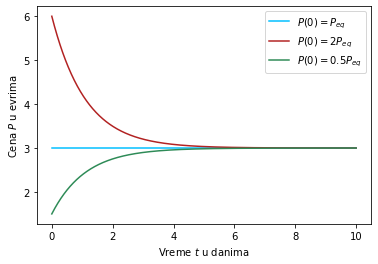

In [10]:
from scipy.integrate import odeint
t = np.linspace(0, 10, 1000)
p = np.linspace(0, 10, 1000)
z = np.sign(din(p, 0,a,b,c,d,y))
rzl = np.diff(z)
n = np.where(rzl != 0)[0]
Peq = newton(din, t[n[0]], args=(0, a,b,c,d,y))
p0a = [
    (Peq, 'DeepSkyBlue', 'P(0) = P_{eq}'),
    (2 * Peq, 'FireBrick', 'P(0) = 2 P_{eq}'),
    (0.5 * Peq, 'SeaGreen', 'P(0) = 0.5 P_{eq}')
]
plt.figure()
for p0, color, label in p0a:
    p = odeint(din, p0, t, (a,b,c,d,y))
    plt.plot(t, p, color=color, label=f'${label}$')
plt.legend()
plt.xlabel('Vreme $t$ u danima')
plt.ylabel('Cena $P$ u evrima')
plt.show()

d) Da li sistem ima stabilnu dinamiku? Šta se dešava sa cenom posle dovoljno dugog vremena? Da li se dostiže predviđeno stacionarno stanje? 

Ima, jer cena posle odredjenog vremena dostigne ocekivano stacionarno stanje (za vrednost cene 3).

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: Model sa očekivanjima cena

a) Na primeru porodične picerije sa slajdova primeniti kompleksniji model koji uključuje modelovanje očekivanja cene od strane potraživača. U takvom modelu funkcija potražnje $Q_d$ zavisi i od promene cene, kao i od brzine njene promene:

<br>
\begin{equation}
    Q_d = A - BP + M\frac{dP}{dt} + N\frac{d^2P}{dt^2},\\
    Q_s = -C + DP.
\end{equation}
<br>

Diferencijalna jednačina koja opisuje promenu cene proizvoda u ovakvom modelu i koju treba rešavati dobija se izjednačavanjem $Q_d = Q_s$ i ima formu:

<br>
\begin{equation}
    \frac{d^2P}{dt} + \frac{M}{N}\frac{dP}{dt} - \frac{B+D}{N}P = -\frac{A+C}{N}.
\end{equation}
<br>


Formirati Python definiciju (<font color='blue'>ocekivanja_cene</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Koeficijenti $A$, $B$, $C$, $D$, $M$ i $N$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [17]:
def ocekivanja_cene(p,t,a,b,c,d,m,n):
    p1,p2=p
    a2=m/n
    wowo = -(b+d)/n
    return [p2, -(a+c)/n-a2*p2-wowo*p1]

b) Ispitati i diskutovati dinamiku sistema za slučaj sledećih parametara:
<ol>
<li>$A = 42$ pice po danu, $B = 4$ pice po danu po evru, $C = 6$ pica po danu, $D = 8$ pica po danu po evru, $M = –4$ pice po evru, $N = 1$ (u odgovarajućim jedinicama), $P(0) = 6$ evra, $dP/dt(0) = 4$ evra po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li> 
<br>    
    
<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = –2$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
<br> 

<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = 0.5$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
</ol>
Za svaki od tri slučaja na jednom subplot-u nacrtati i vremenski ($P$ u funkciji od $t$) i fazni dijagram ($dP/dt$ u funkciji od $P$) dinamike cene.  

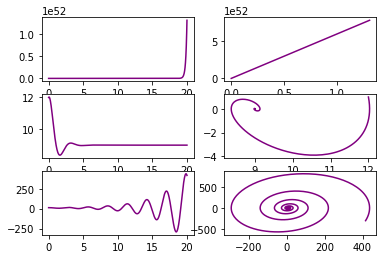

<Figure size 50x50 with 0 Axes>

<Figure size 50x50 with 0 Axes>

<Figure size 50x50 with 0 Axes>

<Figure size 50x50 with 0 Axes>

<Figure size 50x50 with 0 Axes>

<Figure size 50x50 with 0 Axes>

In [25]:
_, axis = plt.subplots(3, 2)
t = np.linspace(0, 20, 1000)
param = [
    (42, 4, 6, 8, -4, 1, 6, 4),
    (40, 2, 5, 3, -2, -1, 12, 1),
    (40, 2, 5, 3, 0.5, -1, 12, 1)
]

for i, (a,b,c,d,m,n,p0,pp0) in enumerate(param):
    integ = odeint(ocekivanja_cene, (p0, pp0), t,(a,b,c,d,m,n))
    trans = np.transpose(integ)
    plt.figure(figsize=(0.5,0.5),dpi=100)
    axis[i, 0].plot(t, trans[0],color="purple")
    plt.figure(figsize=(0.5,0.5),dpi=100)
    axis[i, 1].plot(trans[0], trans[1], color="purple")
plt.show()

c) Na osnovu analize stabilnosti sa slajdova, komentarisati očekivane rezultate dinamike sa dobijenim graficima. 
U kom slučaju je dinamika stabilna, u kom nestabilna i zašto? 
Komentarisati fazne dijagrame. Kojoj vrsti oscilacija odgovara ovakav model? 
Šta bi, prema analogiji sa fizikom, bio najbolji mogući slučaj za dinamiku cene? Predložiti neke vrednosti za parametre $B$, $D$, $M$ i $N$ tako da dinamike cene bude optimalna. Nacrtati grafik takve dinamike cene.

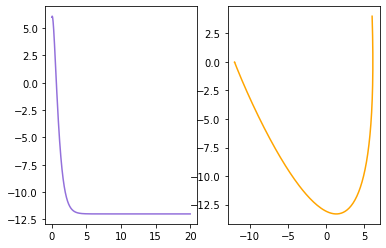

In [24]:
a,b,c,d,m,n,p0,pp0 = 42, -2, 6, -2, 4, 1, 6, 4
integ = odeint(ocekivanja_cene, (p0, pp0), t, (a,b,c,d,m,n))
trans = np.transpose(integ)
_, axis = plt.subplots(1, 2)
axis[0].plot(t, trans[0],color="MediumPurple")
axis[1].plot(trans[0], trans[1], color="orange")
plt.show()

1: jako prigušena oscilacija gde je $\lambda_2 < 0$, pa dinamika nije stabilna, a sa grafika se vidi da ne konvergira sa vremenom;
2: slabo prigušena oscilacija gde je $\alpha > 0$ pa je dinamika stabilna, a sa grafika se vidi da konvergira s vremenom;
3: slabo prigušena oscilacija gde je $\alpha < 0$ pa je dinamika nestabilna. Sa grafika vidimo da amplituda raste iz periode u periodu, sto je za slabo prigusene oscilacije sa negativnim $\alpha$ karakteristicno, pa ne konvergira s vremenom;
Najbolji slučaj prema analogiji sa fizikom bi bila kritično amortizovana oscilacija sa pozitivnim $\alpha$ i parametri za takav slučaj su dati gore.